In [48]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [20]:
# USD/EUR Spot Foreign Exchange Rate
usd_eur = pdr.data.DataReader(
    name='DEXUSEU',
    data_source='fred'
)

# Secured Overnight Financing Rate
overnight_rate = pdr.data.DataReader(
    name='SOFR',
    data_source='fred'
)

# Treasury Securities Sold by the Federal Reserve in the Temporary Open Market Operations 
market_ops = pdr.data.DataReader(
    name='RRPONTSYD',
    data_source='fred'
)

# ECB Deposit Facility Rate for Euro Area
ecb_rate = pdr.data.DataReader(
    name='ECBDFR',
    data_source='fred'
)

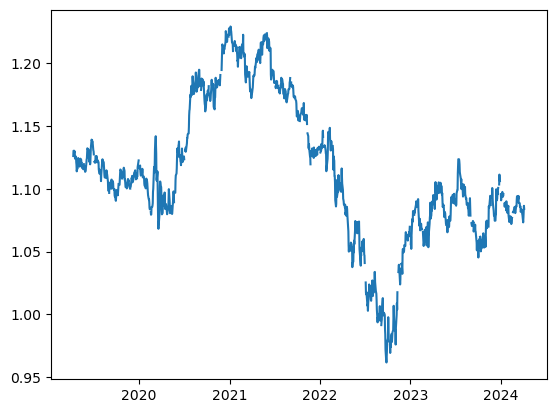

In [49]:
plt.plot(usd_eur)

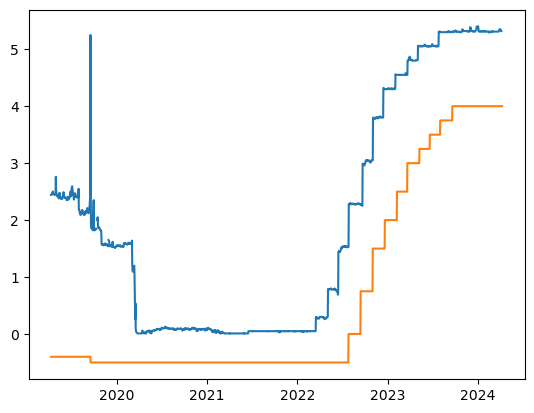

In [51]:
plt.plot(overnight_rate)
plt.plot(ecb_rate)

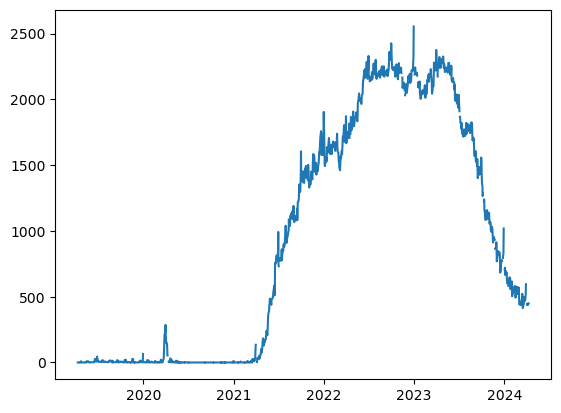

In [52]:
plt.plot(market_ops)

In [64]:
merged_df = overnight_rate.merge(
    right=ecb_rate,
    left_index=True,
    right_index=True
    )

merged_df = merged_df.merge(
    right=market_ops,
    left_index=True,
    right_index=True
)

merged_df = merged_df.merge(
    right=usd_eur,
    left_index=True,
    right_index=True
)

train_set, test_set = np.split(merged_df, [int(.7*len(merged_df))])

/home/luissimaoaf/miniconda3/envs/tf/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


911